In [1]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

In [2]:
#colnames=['MS','App_mod','App_ord','Cou','D_E_Att','Prev_ql','Prev_ql_gr','Nac','Moth_ql','Fath_ql','Moth_oc','Fath_oc','Adm_gra','Dis','Educ_sp_nd','Deb','Tuit_fe_utd','Gen','Sch_hol','Age _en','Int','Curr_cred1','Curr_enro1','Curr_ev1','Curr_appr1','Curr_gr1','Curr_we1','Curr_cred2','Curr_enro2','Curr_ev2','Curr_appr2','Curr_gr2','Curr_we2','Une_rat','Inf_rat','GDP','Tar']
missing_values_format= ["n.a.","?","NA","n/a","na","--","nan","UnKnown","Na"]
df=pd.read_csv("student_data.csv", na_values=missing_values_format)

In [3]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
df.rename(columns={"Marital status":"Marital_status"}, inplace= True)
df.rename(columns={"Application mode":"Application_mode"}, inplace= True)
df.rename(columns={"Application order":"Application_order"}, inplace= True)
df.rename(columns={"Daytime/evening attendance":"Daytime/evening_attendance"}, inplace= True)
df.rename(columns={"Previous qualification":"Previous_qualification"}, inplace= True)
df.rename(columns={"Previous qualification (grade)":"Previous_qualification_(grade)"}, inplace= True)
df.rename(columns={"Mother's qualification":"Mother's_qualification"}, inplace= True)
df.rename(columns={"Father's qualification":"Father's_qualification"}, inplace= True)
df.rename(columns={"Mother's occupation":"Mother's_occupation"}, inplace= True)
df.rename(columns={"Father's occupation":"Father's_occupation"}, inplace= True)
df.rename(columns={"Admission grade":"Admission_grade"}, inplace= True)
df.rename(columns={"Educational special needs":"Educational_special_needs"}, inplace= True)
df.rename(columns={"Tuition fees up to date":"Tuition_fees_up_to_date"}, inplace= True)
df.rename(columns={"Scholarship holder":"Scholarship_holder"}, inplace= True)
df.rename(columns={"Age at enrollment":"Age_at_enrollment"}, inplace= True)
df.rename(columns={"Curricular units 1st sem (credited)":"Curricular_units_1st_sem_(credited)"}, inplace= True)
df.rename(columns={"Curricular units 1st sem (enrolled)":"Curricular_units_1st_sem_(enrolled)"}, inplace= True)
df.rename(columns={"Curricular units 1st sem (evaluations)":"Curricular_units_1st_sem_(evaluations)"}, inplace= True)
df.rename(columns={"Curricular units 1st sem (approved)":"Curricular_units_1st_sem_(approved)"}, inplace= True)
df.rename(columns={"Curricular units 1st sem (grade)":"Curricular_units_1st_sem_(grade)"}, inplace= True)
df.rename(columns={"Curricular units 1st sem (without evaluations)":"Curricular_units_1st_sem_(without_evaluations)"}, inplace= True)
df.rename(columns={"Curricular units 2nd sem (credited)":"Curricular_units_2nd_sem_(credited)"}, inplace= True)
df.rename(columns={"Curricular units 2nd sem (enrolled)":"Curricular_units_2nd_sem_(enrolled)"}, inplace= True)
df.rename(columns={"Curricular units 2nd sem (evaluations)":"Curricular_units_2nd_sem_(evaluations)"}, inplace= True)
df.rename(columns={"Curricular units 2nd sem (approved)":"Curricular_units_2nd_sem_(approved)"}, inplace= True)
df.rename(columns={"Curricular units 2nd sem (grade)":"Curricular_units_2nd_sem_(grade)"}, inplace= True)
df.rename(columns={"Curricular units 2nd sem (without evaluations)":"Curricular_units_2nd_sem_(without_evaluations)"}, inplace= True)
df.rename(columns={"Unemployment rate":"Unemployment_rate"}, inplace= True)
df.rename(columns={"Inflation rate":"Inflation_rate"}, inplace= True)

In [5]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [6]:
df.shape

(4424, 37)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital_status                                  4423 non-null   float64
 1   Application_mode                                4424 non-null   int64  
 2   Application_order                               4424 non-null   int64  
 3   Course                                          4423 non-null   float64
 4   Daytime/evening_attendance                      4424 non-null   int64  
 5   Previous_qualification                          4424 non-null   int64  
 6   Previous_qualification_(grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's_qualification                          4424 non-null   int64  
 9   Father's_qualification                   

In [8]:
df.isnull().sum()

Marital_status                                    1
Application_mode                                  0
Application_order                                 0
Course                                            1
Daytime/evening_attendance                        0
Previous_qualification                            0
Previous_qualification_(grade)                    0
Nacionality                                       0
Mother's_qualification                            0
Father's_qualification                            1
Mother's_occupation                               0
Father's_occupation                               0
Admission_grade                                   1
Displaced                                         1
Educational_special_needs                         0
Debtor                                            1
Tuition_fees_up_to_date                           2
Gender                                            0
Scholarship_holder                                0
Age_at_enrol

In [9]:
df["Tuition_fees_up_to_date"].unique()

array([ 1.,  0., nan])

In [10]:
#Age_at_enrollment
df["Age_at_enrollment"].unique()

array([20., 19., 45., 50., 18., 22., 21., 34., 37., 43., 55., 39., 29.,
       24., 27., 23., 26., 33., 35., 25., 44., 36., 47., 28., 38., nan,
       30., 31., 32., 40., 42., 48., 49., 46., 41., 70., 60., 53., 51.,
       52., 54., 61., 58., 59., 17., 57., 62.])

In [11]:
#Curricular_units_1st_sem_(credited)
df["Curricular_units_1st_sem_(credited)"].unique()

array([ 0.,  2.,  3.,  6.,  7., 13.,  4.,  1.,  5., 19., 11.,  8., 10.,
        9., 15., 12., 14., 18., 17., 16., 20., nan])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital_status                                  4423 non-null   float64
 1   Application_mode                                4424 non-null   int64  
 2   Application_order                               4424 non-null   int64  
 3   Course                                          4423 non-null   float64
 4   Daytime/evening_attendance                      4424 non-null   int64  
 5   Previous_qualification                          4424 non-null   int64  
 6   Previous_qualification_(grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's_qualification                          4424 non-null   int64  
 9   Father's_qualification                   

In [13]:
df.isnull().sum()

Marital_status                                    1
Application_mode                                  0
Application_order                                 0
Course                                            1
Daytime/evening_attendance                        0
Previous_qualification                            0
Previous_qualification_(grade)                    0
Nacionality                                       0
Mother's_qualification                            0
Father's_qualification                            1
Mother's_occupation                               0
Father's_occupation                               0
Admission_grade                                   1
Displaced                                         1
Educational_special_needs                         0
Debtor                                            1
Tuition_fees_up_to_date                           2
Gender                                            0
Scholarship_holder                                0
Age_at_enrol

In [14]:
df.isnull().values.any()

True

In [15]:
df.shape

(4424, 37)

In [16]:
df=df.dropna(axis=0)

In [17]:
df.isnull().values.any()

False

In [18]:
df.shape

(4411, 37)

In [19]:
df["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

In [20]:
df['Target'].replace('Grad', 1, inplace=True)
df['Target'].replace('graduate', 1, inplace=True)
df['Target'].replace('Drop', 0, inplace=True)
df['Target'].replace('dropout', 0, inplace=True)
df['Target'].replace('Dropout', 0, inplace=True)
df['Target'].replace('Graduate', 1, inplace=True)
df['Target'].replace('Enrolled', 2, inplace=True)

In [21]:
df["Target"].unique()

array([0, 1, 2], dtype=int64)

In [22]:
df["Target"].describe()

count    4411.000000
mean        0.858309
std         0.693416
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Target, dtype: float64

In [23]:
df_no_label=df.drop(columns=["Target"])

In [24]:
df_no_label.head()

,Marital_status,Application_mode,Application_order,Course,Daytime/evening_attendance,Previous_qualification,Previous_qualification_(grade),Nacionality,Mother's_qualification,Father's_qualification,...,Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),Curricular_units_2nd_sem_(enrolled),Curricular_units_2nd_sem_(evaluations),Curricular_units_2nd_sem_(approved),Curricular_units_2nd_sem_(grade),Curricular_units_2nd_sem_(without_evaluations),Unemployment_rate,Inflation_rate,GDP
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0,0.0,0,0,0.000000,0,10.8,1.4,1.74
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,0,6.0,0,0,0.000000,0,10.8,1.4,1.74
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79


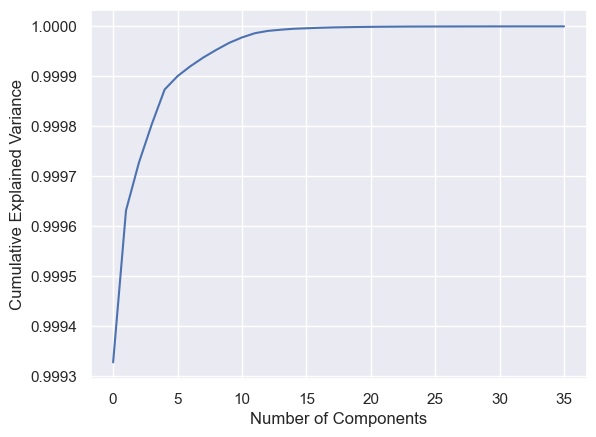

In [25]:
pca=PCA().fit(df_no_label)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance");

In [26]:
pca=PCA(15)
projected=pca.fit_transform(df_no_label)

In [27]:
projected.shape

(4411, 15)

In [28]:
df_pca=pd.DataFrame(projected, columns =["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11","C12","C13","C14","C15"])

In [29]:
df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15
0,8690.618234,-0.922272,-1.156732,-6.148618,-15.234274,6.821512,3.413059,5.337476,-6.391775,-2.859778,-1.247631,-5.390655,-2.229611,0.547886,-0.946406
1,-392.352575,-13.792193,28.935399,22.581788,15.347688,1.456785,-12.066040,-1.440175,2.309746,-1.880907,-2.970336,-0.219032,-3.625523,1.365648,1.342257
2,-208.377218,-2.072389,-8.699952,-27.817669,8.340147,2.612732,4.301406,4.056984,-18.611866,2.556335,0.559512,-3.822841,4.736258,6.415485,-0.774189
3,-911.421657,-9.027342,-18.157498,-18.952023,1.357345,2.024945,3.204783,0.339997,2.764624,0.947694,-0.037455,-5.876638,-0.820115,-0.944101,0.044792
4,847.564697,-0.149329,-36.373231,-0.441910,-7.446410,3.666817,22.203476,28.043036,4.137535,2.053103,0.597940,7.166030,-7.767607,-0.619513,2.303893


In [30]:
df_pca.isnull().values.any()

False

In [31]:
df_pca["Target"]=df["Target"]

In [32]:
df_pca.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Target
0,8690.618234,-0.922272,-1.156732,-6.148618,-15.234274,6.821512,3.413059,5.337476,-6.391775,-2.859778,-1.247631,-5.390655,-2.229611,0.547886,-0.946406,0.0
1,-392.352575,-13.792193,28.935399,22.581788,15.347688,1.456785,-12.066040,-1.440175,2.309746,-1.880907,-2.970336,-0.219032,-3.625523,1.365648,1.342257,1.0
2,-208.377218,-2.072389,-8.699952,-27.817669,8.340147,2.612732,4.301406,4.056984,-18.611866,2.556335,0.559512,-3.822841,4.736258,6.415485,-0.774189,0.0
3,-911.421657,-9.027342,-18.157498,-18.952023,1.357345,2.024945,3.204783,0.339997,2.764624,0.947694,-0.037455,-5.876638,-0.820115,-0.944101,0.044792,1.0
4,847.564697,-0.149329,-36.373231,-0.441910,-7.446410,3.666817,22.203476,28.043036,4.137535,2.053103,0.597940,7.166030,-7.767607,-0.619513,2.303893,1.0


In [33]:
df_pca['Target'].unique()

array([ 0.,  1.,  2., nan])

In [34]:
df_pca.isnull().values.any()

True

In [35]:
df_pca=df_pca.dropna(axis=0)

In [36]:
df_pca.isnull().values.any()

False

In [37]:
df_array=df_pca.values

In [38]:
df_array

array([[ 8.69061823e+03, -9.22272395e-01, -1.15673165e+00, ...,
         5.47885683e-01, -9.46405579e-01,  0.00000000e+00],
       [-3.92352575e+02, -1.37921933e+01,  2.89353994e+01, ...,
         1.36564809e+00,  1.34225709e+00,  1.00000000e+00],
       [-2.08377218e+02, -2.07238919e+00, -8.69995248e+00, ...,
         6.41548472e+00, -7.74189424e-01,  0.00000000e+00],
       ...,
       [-6.38377889e+02, -3.09965699e+00, -3.77899558e+00, ...,
        -2.40846487e+00,  1.19408925e+00,  0.00000000e+00],
       [-2.85350307e+02, -8.21268574e+00,  1.15962595e+00, ...,
        -4.99192822e-03, -3.85866410e-01,  1.00000000e+00],
       [-9.11370995e+02, -5.83578648e+00, -6.93552641e+00, ...,
         8.70297953e-01,  2.37173640e+00,  1.00000000e+00]])

In [71]:
from sklearn.model_selection import train_test_split
X = df_array[:,0:15]
y = df_array[:,15]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.10, random_state=1)

In [69]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [63]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [64]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.491789 (0.008363)
LDA: 0.490275 (0.009450)
KNN: 0.446077 (0.020600)
CART: 0.385198 (0.017631)
NB: 0.469566 (0.023811)
SVM: 0.496591 (0.004074)


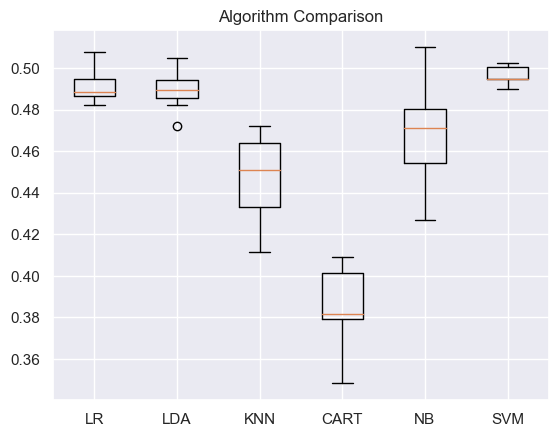

In [65]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [66]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [67]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.5159090909090909
[[  4 132   0]
 [  6 223   0]
 [  1  74   0]]
